<a href="https://colab.research.google.com/github/Barleysack/tensor101/blob/handsonml2_1/Deeplearning_intro_unit11_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np


np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
def logit(z):
  return 1/(1+np.exp(-z))

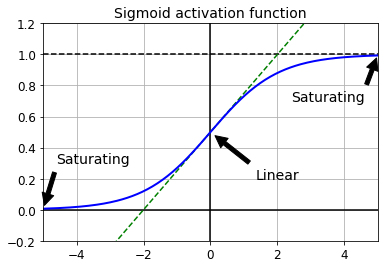

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()
#시그모이드 활성화 함수의 구현 

# Xavier 초기화와 He 초기화


In [5]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [6]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [7]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [8]:
def leaky_relu(z, alpha=0.01):
  return np.maximum(alpha*z,z)
  #여기서 alpha는 누수율. 

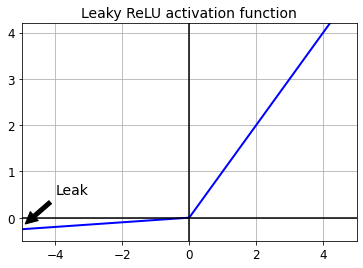

In [13]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

#이로서 역전파시 그래디언트가 소실되는 것을 막을 수 있다. 일반 RELU라면 모든 가중치가 음수에 다다를 시 0으로 수렴한다.


In [14]:
def MYRANDOMleaky_relu(z, alpha):
  alpha= np.random.rand(1)

  return np.maximum(alpha*z,z)

  #이름에서 알 수 있듯 내가 만들어본 랜덤 누수-relu

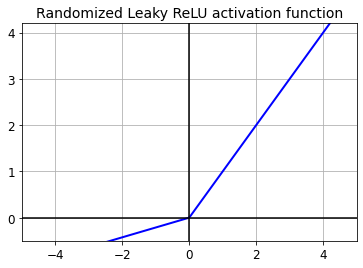

In [29]:
plt.plot(z, MYRANDOMleaky_relu(z, 1), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)

plt.title("Randomized Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [30]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [31]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [34]:

history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4829 - accuracy: 0.8355 - val_loss: 0.4729 - val_accuracy: 0.8440
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4745 - accuracy: 0.8371 - val_loss: 0.4650 - val_accuracy: 0.8452
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4669 - accuracy: 0.8391 - val_loss: 0.4675 - val_accuracy: 0.8388
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4605 - accuracy: 0.8415 - val_loss: 0.4527 - val_accuracy: 0.8474
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4550 - accuracy: 0.8438 - val_loss: 0.4470 - val_accuracy: 0.8506
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4495 - accuracy: 0.8438 - val_loss: 0.4427 - val_accuracy: 0.8528
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4446 - accuracy: 0.8467 - val_loss: 0.4380 - val_accuracy:

In [35]:
#testing prelu

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6969 - accuracy: 0.4974 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8706 - accuracy: 0.7247 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7211 - accuracy: 0.7620 - val_loss: 0.6565 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6447 - accuracy: 0.7881 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6078 - accuracy: 0.8003 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5693 - accuracy: 0.8119 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5428 - accuracy: 0.8194 - val_loss: 0.5196 - val_accuracy:

In [36]:
#elu

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

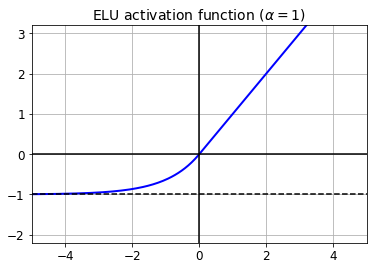

In [37]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [39]:
keras.layers.Dense(10, activation="elu")

In [61]:
#selu
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='selu',kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation='selu', kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation='selu',kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=2e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
#배치 정규화 이후 90퍼센트를 간신히 넘는데 성공했다.
#그래디언트 소실문제 감소로 수렴성을 지닌 시그모이드나 하이퍼볼릭탄젠트 사용 가능. 

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.6811 - accuracy: 0.7766 - val_loss: 0.3761 - val_accuracy: 0.8606
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4163 - accuracy: 0.8496 - val_loss: 0.3594 - val_accuracy: 0.8676
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3686 - accuracy: 0.8668 - val_loss: 0.3336 - val_accuracy: 0.8740
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3315 - accuracy: 0.8778 - val_loss: 0.3062 - val_accuracy: 0.8898
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3109 - accuracy: 0.8858 - val_loss: 0.2917 - val_accuracy: 0.8934
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2837 - accuracy: 0.8943 - val_loss: 0.2993 - val_accuracy: 0.8934
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2728 - accuracy: 0.8978 - val_loss: 0.2995 - val_ac

In [59]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_58 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_59 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_60 (Dense)             (None, 100)             

In [55]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='selu',kernel_initializer="lecun_normal"),
    
    keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'),
    
    keras.layers.Dense(100,activation='selu', kernel_initializer="lecun_normal"),
    
    keras.layers.Dense(10,activation='selu',kernel_initializer='lecun_normal'),
   
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6234 - accuracy: 0.7802 - val_loss: 0.3769 - val_accuracy: 0.8600
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4007 - accuracy: 0.8520 - val_loss: 0.3618 - val_accuracy: 0.8728
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3589 - accuracy: 0.8678 - val_loss: 0.3325 - val_accuracy: 0.8758
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3243 - accuracy: 0.8794 - val_loss: 0.3125 - val_accuracy: 0.8866
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3046 - accuracy: 0.8844 - val_loss: 0.3062 - val_accuracy: 0.8896
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2802 - accuracy: 0.8951 - val_loss: 0.3130 - val_accuracy: 0.8864
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2661 - accuracy: 0.9007 - val_loss: 0.3120 - val_accuracy:

In [57]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_53 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_54 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_57 (Dense)             (None, 10)              